<a href="https://colab.research.google.com/github/Kevin-Yau/CHL5230/blob/main/Datathon_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Read the dataset into a Pandas DataFrame
df = pd.read_csv('mhealth.csv')

In [2]:
# read dataset
wear_df = pd.read_csv('mhealth.csv')
wear_df.head()

# check dimension of the dataset
print(wear_df.shape)

# list the columns of the dataframe
print(wear_df.columns)



(999999, 14)
Index(['alx', 'aly', 'alz', 'glx', 'gly', 'glz', 'arx', 'ary', 'arz', 'grx',
       'gry', 'grz', 'Activity', 'subject'],
      dtype='object')


In [3]:
# Group the dataset by the 'subject' column and apply the `len` function
# to each group. This counts the number of records for each patient.
# The result is a series where the index is 'subject' and the value is the count of records.
patients_with_2_or_more_records = (wear_df.groupby('subject').apply(len) >= 2)


In [4]:

# Filter the original dataset to include only those patients who have 2 or more records.
# This is done by first creating a boolean series `patients_with_2_or_more_records` where the index is 'patient_nbr'
# and the value is True if the patient has 2 or more records, False otherwise.
# Then, using `isin` method to filter `Mobile Health Data` so that it only includes rows where 'subject'
# matches those in the `patients_with_2_or_more_records` series that are True.
patients_with_2_or_more_records_df = wear_df[wear_df['subject'].isin(patients_with_2_or_more_records[patients_with_2_or_more_records].index)]

In [5]:
# Update the original 'wear_df' dataframe with the filtered dataframe.
# This step replaces the original dataset with the subset of patients who have 2 or more records.
wear_df = patients_with_2_or_more_records_df

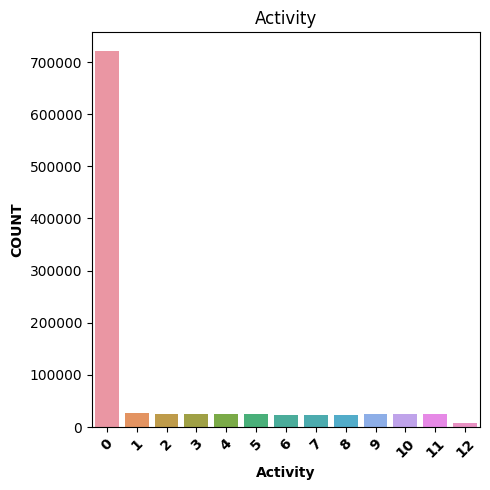

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns


# New color palette
new_colors = ["#eaac8b", "#e56b6f", "#b56576", "#6d597a", "#355070"]  # A more varied color palette
sns.set_palette(sns.color_palette(new_colors))

# Activity Distribution with updated color palette
plt.figure(figsize=(5, 5))
sns.countplot(x='Activity', data=wear_df)
plt.title('Activity')
plt.xlabel('Activity', fontweight='bold')
plt.ylabel('COUNT', fontweight='bold')
plt.xticks(rotation=45, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
updated_race_distribution_fig = plt.gcf()
plt.show()